In [1]:
import sys
import os
import pickle

import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0,'../MATHUSLA_FastSim/')

import DetectorSimulation.Detector as Detector
import DetectorSimulation.Particle as Particle
import DetectorSimulation.Vertex as Vertex

In [3]:
sys.path.insert(0, '../FastSim_Additions')
from Additions import initiate_detector

In [4]:
def make_display_nu(infile, outfile, event_number):
    with open(infile, 'rb') as f:
        data = pickle.load(f)
    position = tuple(data['position'].reshape(100000, 3)[event_number])
    
    daughters = [Particle.Particle(pos, part[:4], part[4]) 
                 for part in data['daughters'][event_number][:,:5]]
    
    vertex = Vertex.Vertex(pos, (20, *pos / np.linalg.norm(pos)), 12, daughters)
    
    detector_benchmark.new_vertex_event(vertex)
    
    filename = os.path.join(os.getcwd(), outfile)
    detector_benchmark.detector_display(filename, show = True)

In [5]:
def make_display_RHN(infile, outfile, event_number):
    with open(infile, 'rb') as f:
        data = pickle.load(f)['Data']
    
    position = tuple(data['position'][event_number])
    daughters = [Particle.Particle(pos, part[:4], part[4]) 
                 for part in data['daughters'][event_number][:,:5]]
    
    vertex = Vertex.Vertex(pos, data['momentum'][event_number], 12, daughters)
    
    detector_benchmark.new_vertex_event(vertex)
    
    filename = os.path.join(os.getcwd(), outfile)
    detector_benchmark.detector_display(filename, show = True)

In [6]:
detector_benchmark = initiate_detector('../MATHUSLA_FastSim/param_card_CDR.txt')

In [7]:
with open('NeutrinoResults/nue_1-2_results.pickle', 'rb') as f:
    neutrino_run = pickle.load(f)

In [8]:
neutrino_run

{'Ev': array([1.46517506, 1.96455696, 1.52168892, ..., 1.21141931, 1.86201277,
        1.14458094]),
 'weight': array([0.00085114, 0.0003847 , 0.00077926, ..., 0.0013823 , 0.00044323,
        0.00163089]),
 'position': array([-28.58931507, 150.64317758,  61.94189042, ...,  28.59290142,
         71.75446244,  67.05791951]),
 'daughters': <Array [[[1.38, 0.304, ..., 7, 1], ...], ...] type='100000 * var * var * fl...'>}

In [9]:
event_number = 100
pos = tuple(neutrino_run['position'].reshape(100000, 3)[event_number])
daughter_p = neutrino_run['daughters'][event_number][:,:4]

In [10]:
daughters = [Particle.Particle(pos, part[:4], part[4]) for part in neutrino_run['daughters'][event_number][:,:5]]

In [11]:
neutrino_4p = ak.sum(neutrino_run['daughters'][event_number][:,:4], axis = 0)

In [12]:
tuple(neutrino_4p)

(2.896875178026815,
 0.0835604274009436,
 -0.1763096599116149,
 0.0835604274009436)

In [13]:
vertex = Vertex.Vertex(pos, tuple(neutrino_4p), 12, daughters)

In [14]:
detector_benchmark.new_vertex_event(vertex)

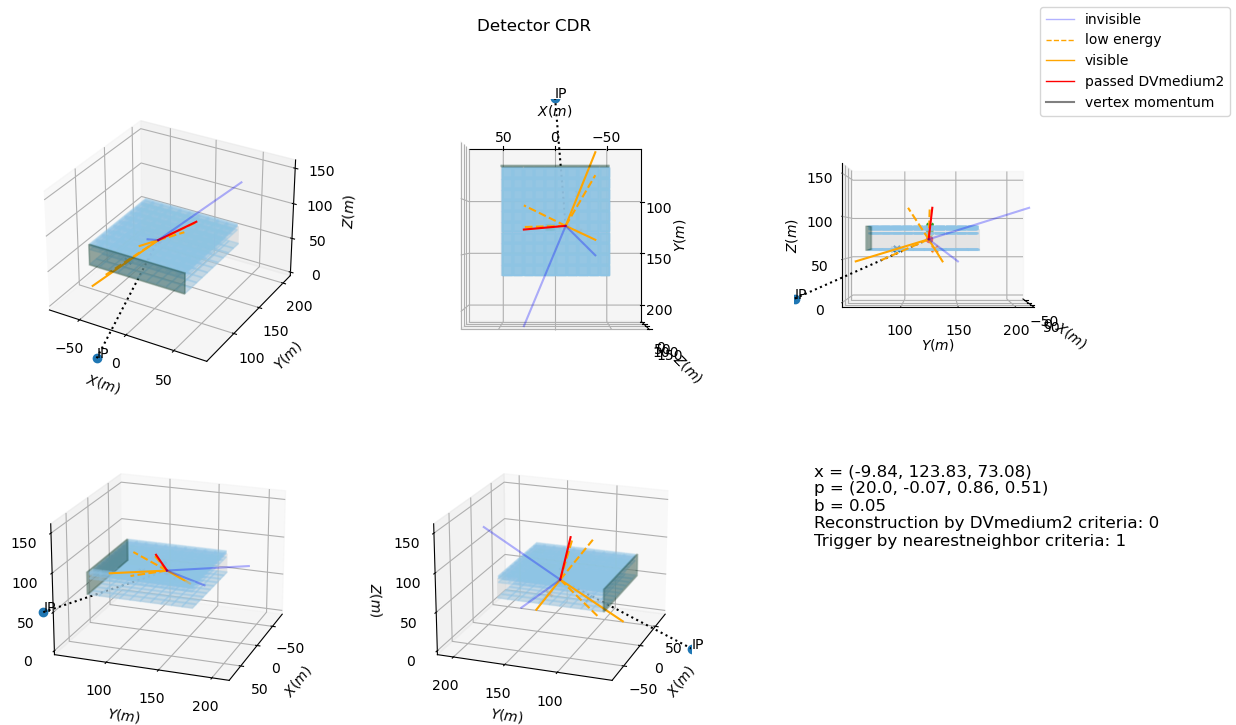

In [26]:
filename = os.path.join(os.getcwd(), 'Neutrino_Event')
detector_benchmark.detector_display(filename, show = True, zorder = 1000)

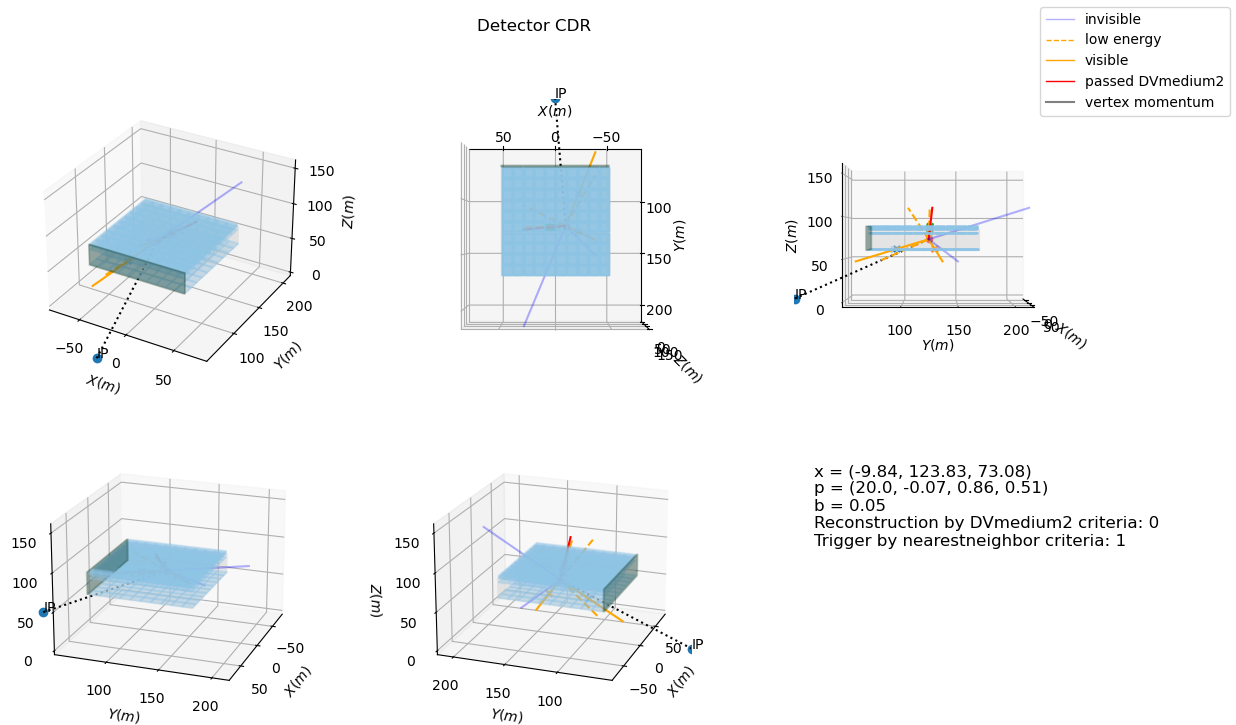

In [28]:
make_display_nu('NeutrinoResults/nue_2-10_results.pickle', 'Neutrino_Event2', 100) #100 ok

In [28]:
with open('LargeRHNSimScripts/Finished_Sim_Ue/sim_Ue_Bmeson_0.205353_7.196856730011514e-05.pickle','rb') as f:
    data = pickle.load(f)

In [ ]:
'Ue',4.08883,5.1794746792312124e-08 #20 ok, 10 more relaxed

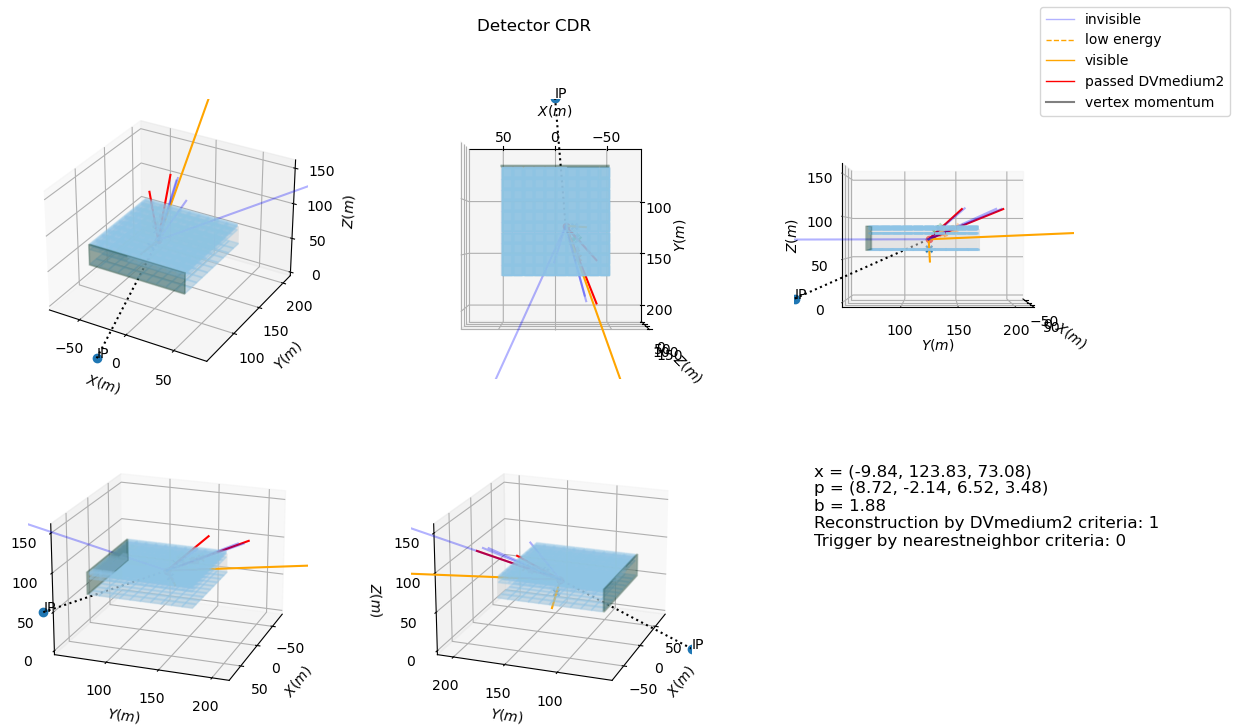

In [23]:
make_display_RHN('LargeRHNSimScripts/Finished_Sim_Ue/sim_Ue_Bmeson_4.08883_5.1794746792312124e-08.pickle',
             'RHN_Event', 3)